# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [36]:
# importing necessary libraries
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [37]:
# Reading the Mapbox API key
load_dotenv()
MAPBOX_API_KEY = os.getenv("MAPBOX_API_KEY")
px.set_mapbox_access_token(MAPBOX_API_KEY)

In [38]:
#checking the API key
MAPBOX_API_KEY

'pk.eyJ1IjoiZHJnaG93YXJkIiwiYSI6ImNsMWhqanY2bjFscGQzam54dDdpdzBndmEifQ.U6kaT6Lwd4AUgGYxybn9-Q'

## Load Data

In [39]:
# Reading the census csv data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [41]:
# Calculating the mean number of housing units per year  
mean_housing_units = sfo_data.groupby("year").mean()
mean_housing_units = mean_housing_units.drop(["gross_rent","sale_price_sqr_foot"], axis=1)
mean_housing_units


,housing_units
year,
2010,372560.0
2011,374507.0
2012,376454.0
2013,378401.0
2014,380348.0
2015,382295.0
2016,384242.0


In [43]:
# Saving the dataframe as a csv file
mean_housing_units.to_csv('mean_housing_units.csv')
# total_housing_units.to_csv
# total_housing_units.csv

<AxesSubplot:xlabel='year'>

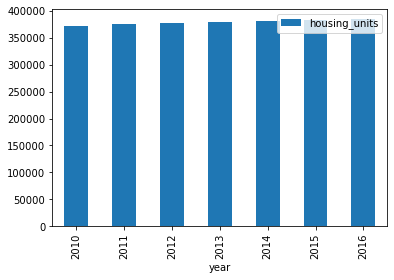

In [14]:
# Using the Pandas plot function to plot the average housing units per year.
mean_housing_units.plot.bar()

# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
# YOUR CODE HERE!

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [44]:
#Calculating the average sale price per square foot and average gross rent
sales_price_sqr_foot = sfo_data.groupby("year").mean()
sales_price_sqr_foot = sales_price_sqr_foot.drop(["gross_rent","housing_units"], axis=1)
sales_price_sqr_foot

gross_rent = sfo_data.groupby("year").mean()
gross_rent = gross_rent.drop(["housing_units","sale_price_sqr_foot"], axis=1)
gross_rent

,gross_rent
year,
2010,1239.0
2011,1530.0
2012,2324.0
2013,2971.0
2014,3528.0
2015,3739.0
2016,4390.0


<AxesSubplot:xlabel='year'>

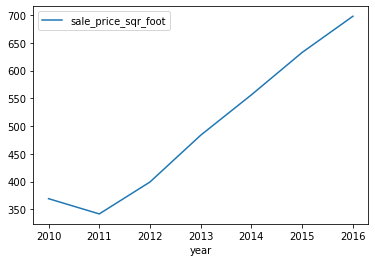

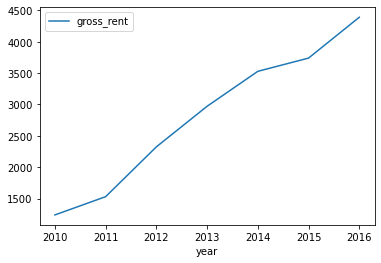

In [16]:
# Creating two line charts, one to plot the average sale price per square foot and another for average montly rent
sales_price_sqr_foot.plot()
gross_rent.plot()

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [47]:
# Grouping by year and neighborhood to create a new dataframe of the mean values
average_prices_neighborhoods=sfo_data.groupby(["year","neighborhood"]).mean()
average_prices_neighborhoods = pd.DataFrame(average_prices_neighborhoods)
display (average_prices_neighborhoods)

average_rents_neighborhoods=sfo_data.groupby(["year","neighborhood"]).mean()
average_rents_neighborhoods = pd.DataFrame(average_rents_neighborhoods)
display (average_rents_neighborhoods)



sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                          
2010 Alamo Square                     291.182945       372560.0      1239.0
     Anza Vista                       267.932583       372560.0      1239.0
     Bayview                          170.098665       372560.0      1239.0
     Buena Vista Park                 347.394919       372560.0      1239.0
     Central Richmond                 319.027623       372560.0      1239.0
...                                          ...            ...         ...
2016 Telegraph Hill                   903.049771       384242.0      4390.0
     Twin Peaks                       970.085470       384242.0      4390.0
     Van Ness/ Civic Center           552.602567       384242.0      4390.0
     Visitacion Valley                328.319007       384242.0      4390.0
     Westwood Park                    631.195426       384242.0      4390.0

[397 rows x 3 columns]

sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                          
2010 Alamo Square                     291.182945       372560.0      1239.0
     Anza Vista                       267.932583       372560.0      1239.0
     Bayview                          170.098665       372560.0      1239.0
     Buena Vista Park                 347.394919       372560.0      1239.0
     Central Richmond                 319.027623       372560.0      1239.0
...                                          ...            ...         ...
2016 Telegraph Hill                   903.049771       384242.0      4390.0
     Twin Peaks                       970.085470       384242.0      4390.0
     Van Ness/ Civic Center           552.602567       384242.0      4390.0
     Visitacion Valley                328.319007       384242.0      4390.0
     Westwood Park                    631.195426       384242.0      4390.0

[397 rows x 3 columns]

In [48]:
# Using hvplot to create an interactive line chart of the average price per sq ft. with a dropdown selector for the neighborhood 
average_prices_neighborhoods.hvplot(x = "year", y = "sale_price_sqr_foot", kind = "line",
    xlabel="Year",
    groupby = "neighborhood",
    ylabel="Gross Rent / Sale Price Per Square Foot",
    title="Sale Price Per Square Foot and Average Gross Rent - 2010-2016 - San Francisco")

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [49]:
# Using hvplot to create an interactive line chart of the average monthly rent with a dropdown selector for the neighborhood. 
average_rents_neighborhoods.hvplot(x='year',
                                   y='gross_rent',
                                   groupby = "neighborhood",
                                   kind ='line')

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [21]:
# Getting the data from the top 10 expensive neighborhoods to own
df_temp = sfo_data.groupby("neighborhood").mean()
top_10_expensive = df_temp.nlargest(10,'sale_price_sqr_foot')
top_10_expensive

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Union Square District,903.993258,377427.50,2555.166667
Merced Heights,788.844818,380348.00,3414.000000
Miraloma Park,779.810842,375967.25,2155.250000
Pacific Heights,689.555817,378401.00,2817.285714
Westwood Park,687.087575,382295.00,3959.000000
Telegraph Hill,676.506578,378401.00,2817.285714
Presidio Heights,675.350212,378401.00,2817.285714
Cow Hollow,665.964042,378401.00,2817.285714
Potrero Hill,662.013613,378401.00,2817.285714


In [50]:
# Plotting the data from the top 10 expensive neighborhoods
top_10_expensive.hvplot(x='neighborhood',
                        y='gross_rent',
                        kind ='bar',
                       rot = 90,
                       height = 500)

:Bars   [neighborhood]   (gross_rent)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [52]:
# Fetching the previously generated DataFrame that was grouped by year and neighborhood
average_prices_neighborhoods=sfo_data.groupby(["year","neighborhood"]).mean()
average_prices_neighborhoods = pd.DataFrame(average_prices_neighborhoods)
average_prices_neighborhoods

sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                          
2010 Alamo Square                     291.182945       372560.0      1239.0
     Anza Vista                       267.932583       372560.0      1239.0
     Bayview                          170.098665       372560.0      1239.0
     Buena Vista Park                 347.394919       372560.0      1239.0
     Central Richmond                 319.027623       372560.0      1239.0
...                                          ...            ...         ...
2016 Telegraph Hill                   903.049771       384242.0      4390.0
     Twin Peaks                       970.085470       384242.0      4390.0
     Van Ness/ Civic Center           552.602567       384242.0      4390.0
     Visitacion Valley                328.319007       384242.0      4390.0
     Westwood Park                    631.195426       384242.0      4390.0

[397 rows x 3 columns]

In [53]:
# Plotting the data from the top 10 expensive neighborhoods
average_prices_neighborhoods.hvplot(x = "year", y = ["gross_rent","sale_price_sqr_foot"], kind = "line",
    xlabel="Year",
    groupby = "neighborhood",
    ylabel="Gross Rent / Sale Price Per Square Foot",
    title="Sale Price Per Square Foot and Average Gross Rent - 2010-2016 - San Francisco")

:DynamicMap   [neighborhood]
   :NdOverlay   [Variable]
      :Curve   [year]   (value)

In [54]:
gross_rent = average_prices_neighborhoods.hvplot(x = "year", y = "gross_rent", kind = "line",
    xlabel="Year",
    groupby = "neighborhood",
    ylabel="Gross Rent",
    title="Average Gross Rent - 2010-2016 - San Francisco")
sale_price_sqr_foot = average_prices_neighborhoods.hvplot(x = "year", y = "sale_price_sqr_foot", kind = "bar",
    xlabel="Year",
    groupby = "neighborhood",
    ylabel="Sale Price Per Square Foot",
    title="Sale Price Per Square Foot - 2010-2016 - San Francisco")
gross_rent + sale_price_sqr_foot

:Layout
   .DynamicMap.I  :DynamicMap   [neighborhood]
      :Curve   [year]   (gross_rent)
   .DynamicMap.II :DynamicMap   [neighborhood]
      :Bars   [year]   (sale_price_sqr_foot)

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [55]:
# Loading the neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
neighborhoods_coordinates = pd.read_csv(file_path, index_col="Neighborhood")
neighborhoods_coordinates.head()

,Lat,Lon
Neighborhood,,
Alamo Square,37.791012,-122.402100
Anza Vista,37.779598,-122.443451
Bayview,37.734670,-122.401060
Bayview Heights,37.728740,-122.410980
Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [57]:
# Calculating the mean values for each neighborhood
df_all_neighborhoods = sfo_data.groupby(by="neighborhood").mean()
df_all_neighborhoods.reset_index(inplace=True)
df_all_neighborhoods.rename(columns={"neighborhood": "Neighborhood"}, inplace=True)
df_all_neighborhoods.head()

,Neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333


In [58]:
# Joining the average values with the neighborhood locations
df_all_neighborhoods = pd.merge(
    neighborhoods_coordinates, df_all_neighborhoods, on="Neighborhood", how="inner"
)
df_all_neighborhoods.head()

,Neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
4,Buena Vista Park,37.768160,-122.439330,452.680591,378076.5,2698.833333


### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

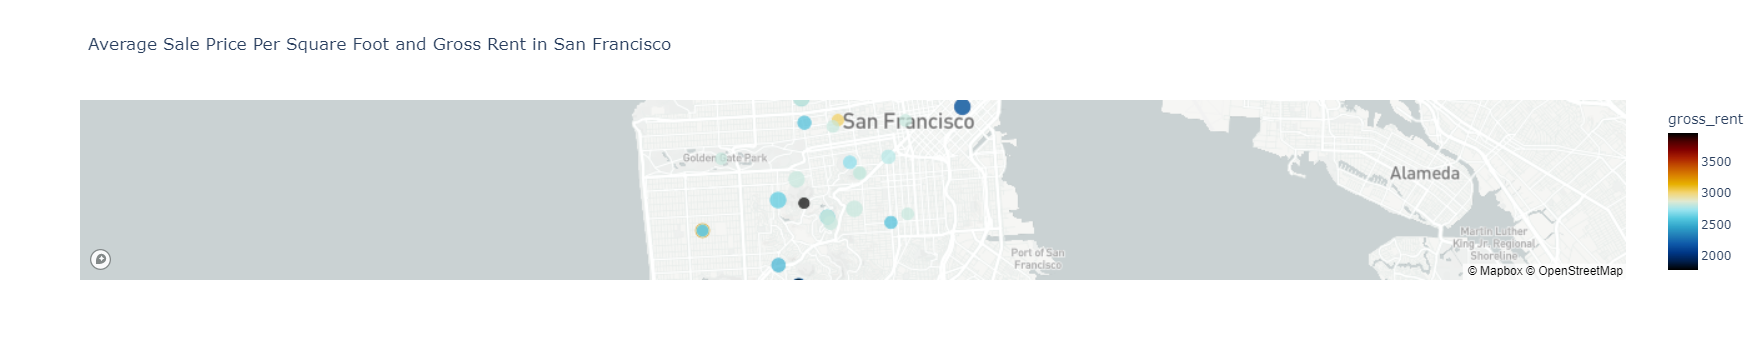

In [59]:
# Creating a scatter mapbox to analyze neighborhood info
neighorbood_map = px.scatter_mapbox(
    df_all_neighborhoods,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    color_continuous_scale=px.colors.cyclical.IceFire,
    size_max=15,
    zoom=11,
    hover_name="Neighborhood",
    title="Average Sale Price Per Square Foot and Gross Rent in San Francisco",
)
neighorbood_map

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [61]:
# Fetching the data from all expensive neighborhoods per year.
df_all_neighborhoods = sfo_data.groupby(by="neighborhood").mean()
df_all_neighborhoods.reset_index(inplace=True)
df_all_neighborhoods.rename(columns={"neighborhood": "Neighborhood"}, inplace=True)
df_all_neighborhoods

,Neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.00,2817.285714
1,Anza Vista,373.382198,379050.00,3031.833333
2,Bayview,204.588623,376454.00,2318.400000
3,Bayview Heights,590.792839,382295.00,3739.000000
4,Bernal Heights,576.746488,379374.50,3080.333333
...,...,...,...,...
68,West Portal,498.488485,376940.75,2515.500000
69,Western Addition,307.562201,377427.50,2555.166667
70,Westwood Highlands,533.703935,376454.00,2250.500000
71,Westwood Park,687.087575,382295.00,3959.000000


### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


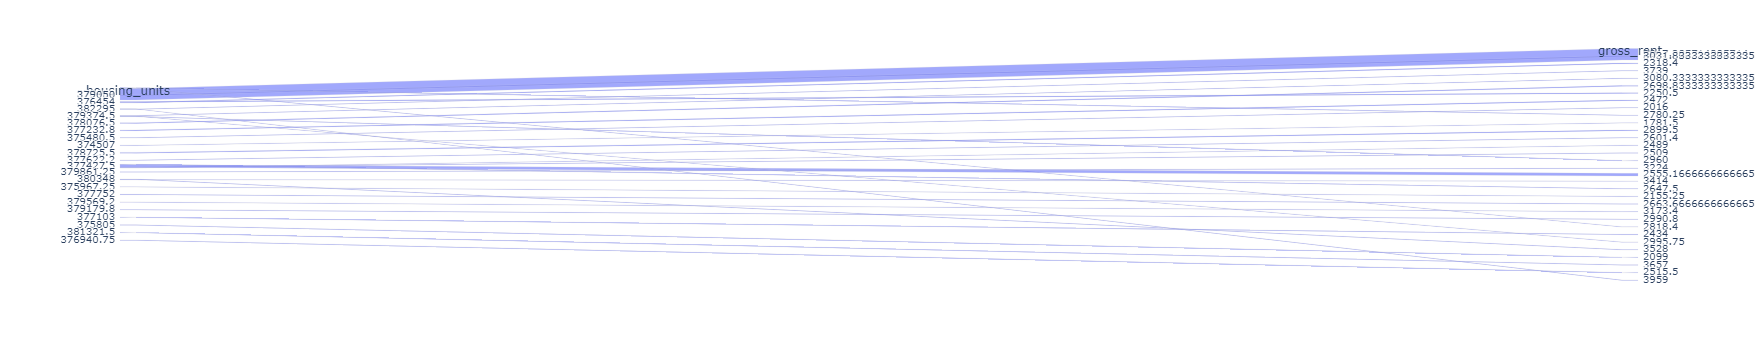

In [31]:
# Parallel Categories Plot
#df_expensive_neighborhoods_per_year
px.parallel_categories(
    df_all_neighborhoods)

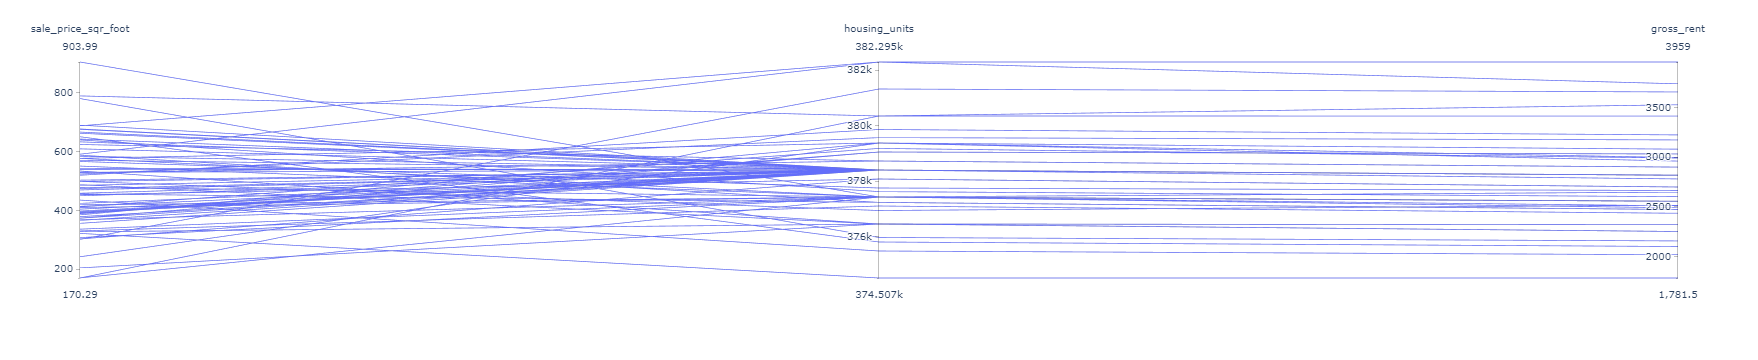

In [35]:
# Parallel Coordinates Plot
px.parallel_coordinates(df_all_neighborhoods)

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

In [69]:
# Sunburst Plot
df=df_all_neighborhoods
fig=px.sunburst(df,path=["Neighboorhood","gross_rent"],
                        values="sale_price_sqr_foot")
fig.show()


ValueError: Value of 'path_0' is not the name of a column in 'data_frame'. Expected one of ['Neighborhood', 'sale_price_sqr_foot', 'housing_units', 'gross_rent'] but received: Neighboorhood